In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
from tqdm import tqdm


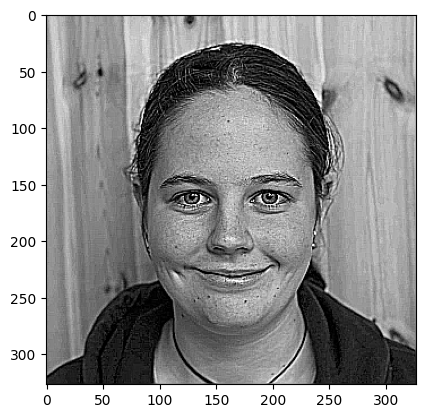

In [7]:
img = cv2.imread("../julca2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.resize(img, (img.shape[1] * 2, img.shape[0] * 2))

# img = np.full_like(img, 255) - img


img_pil = Image.fromarray(img)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
# img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
# enhanced = cv2.Canny(img, 30, 70)

img = np.array(img_pil)
# img = cv2.addWeighted(img, 0.9, cv2.GaussianBlur(enhanced, (5, 5), 7), 1.0, 0)


plane = np.full_like(img, 255)
plane[0, 0] = 0
plane[0, 1] = 255


imshow(img, cmap="gray")


In [8]:
def generate_circle_points(center, radius, n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    points = [
        (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))
        for angle in angles
    ]
    return points


print(img.shape)
center = (img.shape[0] // 2, img.shape[1] // 2)
radius = min(img.shape[0], img.shape[1]) // 2 - 5
n = 200
circle_points = generate_circle_points(center, radius, n)

# Plot the points on the image
# for point in circle_points:
# img_gray[int(point[1]), int(point[0])] = 255

# imshow(img_gray, cmap="gray")

spagat = [0]


(327, 327)


100%|██████████| 10000/10000 [02:42<00:00, 61.47it/s]


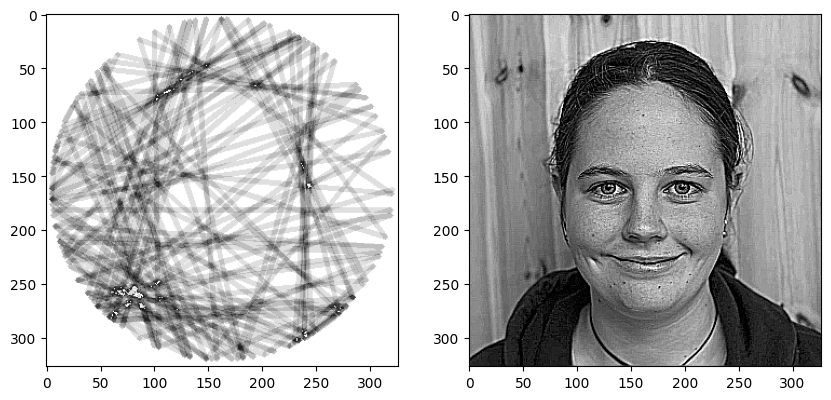

In [10]:
import math


for _ in tqdm(range(10_000)):
    actual = spagat[-1]
    best = [-1, math.inf]
    for i, point in enumerate(circle_points):
        if i == actual:
            continue

        line_img = cv2.line(
            np.full_like(plane, 0),
            tuple(map(int, circle_points[actual])),
            tuple(map(int, point)),
            32,
            3,
            # lineType=cv2.LINE_AA,
        )

        tmp_plane = plane - line_img

        error_img = tmp_plane - img
        error = np.sum(error_img)

        if error < best[1]:
            best = [i, error]

    spagat.append(best[0])

    line_plane = cv2.line(
        np.full_like(plane, 0),
        tuple(map(int, circle_points[actual])),
        tuple(map(int, circle_points[best[0]])),
        32,
        3,
    )

    plane = plane - line_plane


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(plane, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")
